In [29]:
from lucanode.models.unet import Unet
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
set_session(tf.Session(config=config))

In [8]:
BASE_DATASET_PATH = Path("/home/ofont/DATASETS/LUNA/")
UNET_WEIGHTS_FILE = BASE_DATASET_PATH / "unet_generator.h5"
NUMPY_ARRAY_FILE = BASE_DATASET_PATH / "nodule_slices_arr.npy"
METADATA_CSV_FILE = BASE_DATASET_PATH / "nodule_slices_metadata.csv"

In [5]:
model = Unet(512, 512)
model.load_weights(UNET_WEIGHTS_FILE)

In [14]:
df = pd.read_csv(METADATA_CSV_FILE)
slices_arr = np.load(str(NUMPY_ARRAY_FILE), mmap_mode='r')
validation_df = df[(df["original_idx"] % 10 >= 7) & (df["original_idx"] % 10 < 9)]

KeyboardInterrupt: 

In [46]:
validation_slices_batch = slices_arr[validation_df["export_idx"][:5]]
masked_slices = validation_slices_batch[:, 0, :, :] * validation_slices_batch[:, 1, :, :] + (validation_slices_batch[:, 1, :, :]-2)*4000
masked_slices = masked_slices[:, :, :, np.newaxis]

In [20]:
results = model.predict(masked_slices)

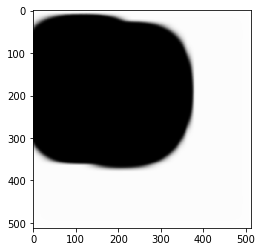

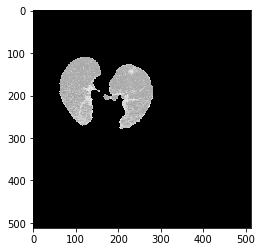

In [47]:
n = 3
plt.imshow(results[n, :, :, 0], cmap="gray")
plt.show()
plt.imshow(masked_slices[n, :, :, 0], cmap="gray")
plt.show()